In [1]:
import cv2
import skimage as ski
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir("..")
os.getcwd()


'/home/prf/PycharmProjects/RinocitologiaPython'

# Skimage vs Opencv: basic image processing comparison

In [9]:
img_path = "data/datasets/raw_it#1/dataset_050718/bruni/img-0210.png"

In [10]:
img_ski = ski.io.imread(img_path)
img_ski= ski.img_as_float32(img_ski)

type(img_ski),img_ski.dtype, img_ski.min(), img_ski.max()

(numpy.ndarray, dtype('float32'), 0.14901961, 1.0)

### Skimage vs Opencv: image loading and normalization

In [11]:
img_cv = cv2.imread(img_path)
img_cv = cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
img_cv = cv2.normalize(img_cv, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
type(img_cv),img_cv.dtype, img_cv.min(), img_cv.max()

(numpy.ndarray, dtype('float64'), 0.0, 0.9999999999999999)

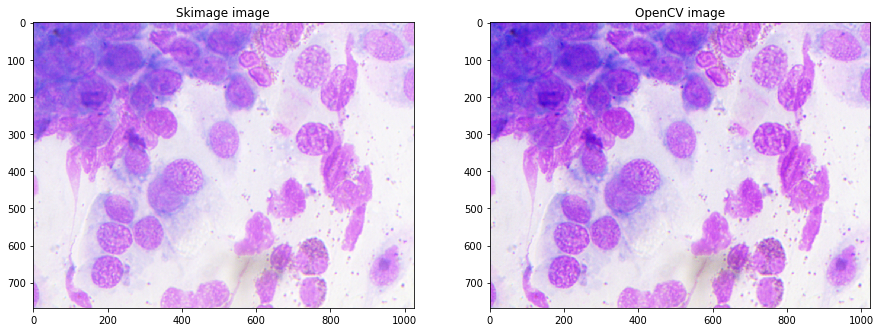

In [12]:
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,50))
axs[0].imshow(img_ski)
axs[0].set_title("Skimage image")
axs[1].imshow(img_cv)
axs[1].set_title("OpenCV image")
plt.show()

In [6]:
diff_img=np.abs(img_cv-img_ski)
diff_img.min(),diff_img.max()

(0.00015541477875569143, 0.09803922474384308)

### Skimage vs Opencv: image downscaling

/home/prf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/prf/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


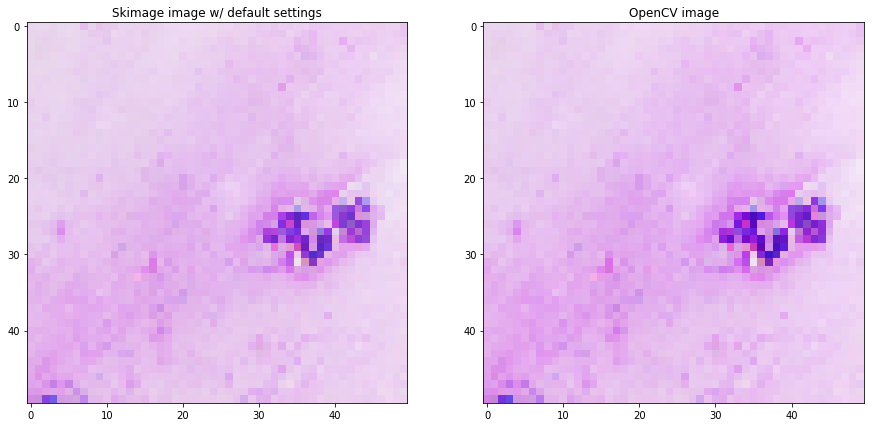

In [7]:
f2,axs2= plt.subplots(nrows=1,ncols=2,figsize=(15,50))

axs2[0].imshow(ski.transform.resize(img_ski,(50,50)))
axs2[0].set_title("Skimage image w/ default settings")
axs2[1].imshow(cv2.resize(img_cv,(50,50)))
axs2[1].set_title("OpenCV image")
plt.show()

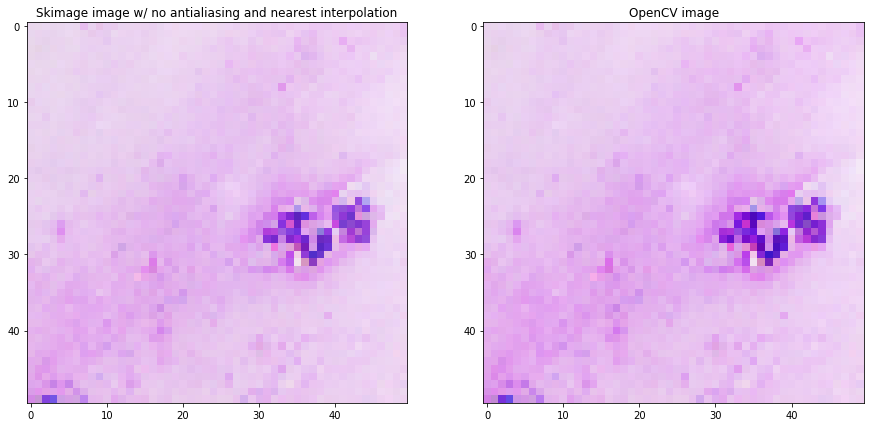

In [8]:
f2,axs3= plt.subplots(nrows=1,ncols=2,figsize=(15,50))

axs3[0].imshow(ski.transform.resize(img_ski,(50,50),order=0,anti_aliasing=False))
axs3[0].set_title("Skimage image w/ no antialiasing and nearest interpolation")
axs3[1].imshow(cv2.resize(img_cv,(50,50)))
axs3[1].set_title("OpenCV image")
plt.show()

### Analysis
 Le immagini sembrano abbastanza uguali, l'unica differenza percepibile è il **livello d'intensità minimo**, in opencv viene applicata una normalizazzione *min-max* pura, riscalando i valori nel range: **[0-1]**; in skimage viene applicata un normalizzazione *min-max* cercando di rispettare la scala d'intensità originale, si nota infatti come il range normalizzato risulta: **[~0.1,1]**.
 
 Per quanto riguarda l'algoritmo di **downscaling**, le impostazioni di default di entrambe le librerie portano agli stessi risultati.